In [1]:
# load packages
import os
import csv

import numpy as np 
import pandas as pd 
import itertools
import re

import gensim
from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess
from collections import defaultdict

from nltk.stem import SnowballStemmer   
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [1]:
# Load tweets data
#data = pd.read_csv("data/all_english_tweets_preprocessed.csv",lineterminator='\n')

In [ ]:
data.info()

In [4]:
data.head()

Unnamed: 0  Unnamed: 0.1               userid         username  \
0           0        357018            962369743         toonspt_   
1           1        357021           1073676020  IndiaTodayFLASH   
2           2        357023  1040140500718837760       Areopagiet   
3           3        357031           3821643918      Sicarius130   
4           4        357034            485905284   TheAAntagonist   

                                            acctdesc     location  following  \
0            พยรลก 😉\nจะเปิดแอคเมื่อขายของเท่านั้น!!          NaN        462   
1  No dragging feet on news. Crisp & short news s...          NaN        117   
2  Dᴀᴅ ღ Pʜɪ & Qᴜɪ /Pᴀʀᴛɴᴇʀ | Aᴛʜᴇɪsᴛ | ADD /ASS ...      EU v2.0       5008   
3  Christie // 刀剣乱舞 (izmt+mtiz for life) + 2.5D (...    Hong Kong        459   
4  T.A.A | The handwriting on the wall: LIVE by t...  Omnipresent      12061   

   followers  totaltweets               usercreatedts  ...  language  \
0          7        20549  2012-11-21 13:01:19.000000  ...        en   
1    1152610       589066  2013-01-09 12:46:38.000000  ...        en   
2        267         9894  2018-09-13 07:29:55.000000  ...        en   
3        272        57829  2015-10-08 04:49:27.000000  ...        en   
4      13484          813  2012-02-07 18:10:59.000000  ...        en   

  coordinates  favorite_count                 extractedts   timestamp  \
0         NaN               0  2022-02-24 06:51:34.430620  24-02-2022   
1         NaN               0  2022-02-24 06:51:34.403108  24-02-2022   
2         NaN               0  2022-02-24 06:51:34.384864  24-02-2022   
3         NaN               0  2022-02-24 06:51:34.311760  24-02-2022   
4         NaN               0  2022-02-24 06:51:34.284328  24-02-2022   

   hashtags_words timestamp_H  timestamp_M  \
0  Ukraine Russia           6           48   
1         ITVideo           6           48   
2  Ukraine Russia           6           48   
3  Ukraine Russia           6           48   
4   Putin Ukraine           6           48   

                                        cleaned_text  \
0  footage of the airport bombing in ivano franki...   
1  ukraine mp sophia fedyna tells about the groun...   
2  a cruise missile fired by the russian army fel...   
3  spread and share you can help ukraine ukraine ...   
4  now this is wrong absolutely wrong for joebide...   

                                      tokenized_text  
0  ['footage', 'airport', 'bombing', 'ivano', 'fr...  
1  ['ukraine', 'mp', 'sophia', 'fedyna', 'tells',...  
2  ['cruise', 'missile', 'fired', 'russian', 'arm...  
3  ['spread', 'share', 'help', 'ukraine', 'ukrain...  
4  ['wrong', 'absolutely', 'wrong', 'joebiden', '...  

[5 rows x 25 columns]

# Word2Vec

In [5]:
def tokenize(text):
    tokens = re.split(r'\W+', text)
    return tokens
corpus_data=data["cleaned_text"].astype(str).apply(tokenize)

In [6]:
corpus_data

0          [footage, of, the, airport, bombing, in, ivano...
1          [ukraine, mp, sophia, fedyna, tells, about, th...
2          [a, cruise, missile, fired, by, the, russian, ...
3          [spread, and, share, you, can, help, ukraine, ...
4          [now, this, is, wrong, absolutely, wrong, for,...
                                 ...                        
2022252    [us, javelins, breaks, the, all, time, destroy...
2022253    [russian, rock, singer, chicherina, cuts, ukra...
2022254    [monday, march, confirmation, hearings, for, s...
2022255    [for, four, years, the, actor, comedian, volod...
2022256    [when, the, volumes, of, hell, are, opened, fo...
Name: cleaned_text, Length: 2022257, dtype: object

In [7]:
corpus_list=corpus_data.tolist()
model = gensim.models.Word2Vec(corpus_list, min_count=10, vector_size=100)

In [14]:
print(np.asarray(model.wv.vectors).shape)

(70734, 100)


In [15]:
for index, word in enumerate(model.wv.index_to_key):
    if index==30:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/70734 is the
word #1/70734 is ukraine
word #2/70734 is http
word #3/70734 is to
word #4/70734 is of
word #5/70734 is and
word #6/70734 is in
word #7/70734 is russia
word #8/70734 is a
word #9/70734 is is
word #10/70734 is putin
word #11/70734 is s
word #12/70734 is for
word #13/70734 is on
word #14/70734 is russian
word #15/70734 is are
word #16/70734 is war
word #17/70734 is you
word #18/70734 is this
word #19/70734 is it
word #20/70734 is with
word #21/70734 is that
word #22/70734 is t
word #23/70734 is i
word #24/70734 is from
word #25/70734 is we
word #26/70734 is will
word #27/70734 is be
word #28/70734 is not
word #29/70734 is nato


In [16]:
print(model.predict_output_word(['putin'], topn = 50))

[('vladimir', 0.063563876), ('warcriminal', 0.05103124), ('criminal', 0.028671557), ('putinstinypenis', 0.014034401), ('xijinping', 0.008687633), ('murderer', 0.0063898275), ('overthrow', 0.0063289437), ('butcher', 0.0047933627), ('mr', 0.004119915), ('apologist', 0.0036794331), ('supporter', 0.0036292146), ('thug', 0.0034407047), ('xi', 0.003414002), ('depose', 0.0030470502), ('loves', 0.0029397465), ('murderous', 0.0027125655), ('hates', 0.0026879597), ('apologists', 0.0026050438), ('emboldened', 0.0025114117), ('wants', 0.0023230917), ('adolf', 0.0020027466), ('lover', 0.0019614387), ('psychopath', 0.0019580375), ('lukashenko', 0.0017857046), ('swar', 0.0017846134), ('dictator', 0.0017739079), ('unhinged', 0.00175568), ('evil', 0.0017292394), ('emboldening', 0.0016952568), ('asshole', 0.001669219), ('fuck', 0.0016519328), ('russland', 0.0015160278), ('confront', 0.0014426997), ('rasputin', 0.0013997578), ('miscalculated', 0.0013674113), ('stalin', 0.0013400859), ('enabling', 0.00132

In [17]:
print(model.predict_output_word(['zelensky'], topn = 50))

[('volodymyr', 0.99888706), ('pres', 0.0005959887), ('president', 0.00027267207), ('zelenskyy', 2.1775404e-05), ('zelenskyyuaaa', 8.971808e-06), ('zelenskywarcriminal', 8.525716e-06), ('zelenskiy', 7.4677446e-06), ('zelensky', 7.018074e-06), ('volodymr', 6.866342e-06), ('yidiot', 6.1465935e-06), ('kyivnow', 5.280814e-06), ('vitaliklitschko', 3.9554243e-06), ('surrender', 3.6393092e-06), ('prez', 3.1825434e-06), ('menikmati', 2.6261278e-06), ('volodymir', 2.4801159e-06), ('zelenski', 2.4734372e-06), ('volodimir', 2.3305465e-06), ('puppet', 2.2776194e-06), ('speech', 2.2494607e-06), ('pleads', 2.115637e-06), ('volodymyrzelenskyy', 2.1123265e-06), ('volodymyrzelensky', 2.111237e-06), ('accuses', 2.0723508e-06), ('jew', 2.0440966e-06), ('klitschko', 2.0380885e-06), ('comedian', 1.9314775e-06), ('hero', 1.8192911e-06), ('volodomyr', 1.6984801e-06), ('zelenskyj', 1.6841755e-06), ('zelenksy', 1.5210246e-06), ('zelenskyyisahero', 1.3864508e-06), ('keepkyivfree', 1.3283349e-06), ('slams', 1.308

In [18]:
print(model.predict_output_word(['sanction'], topn = 50))

[('imposed', 0.53794503), ('imposing', 0.24479872), ('impose', 0.13921632), ('tighten', 0.009280322), ('imposes', 0.0053209015), ('unilateral', 0.002927617), ('tougher', 0.0028952786), ('loophole', 0.0026474732), ('russianoil', 0.0024541044), ('evade', 0.001886849), ('stricter', 0.001130201), ('package', 0.0011233169), ('sanction', 0.0011021375), ('slapped', 0.0010697764), ('oligarchs', 0.0010484084), ('crippling', 0.0010142827), ('circumvent', 0.00091247406), ('lifted', 0.00083385804), ('harshest', 0.0008108575), ('abramovich', 0.0006669907), ('boycotts', 0.00062731333), ('refusing', 0.00057505374), ('sanctionsrussianow', 0.00053896924), ('economic', 0.00051997526), ('banks', 0.0005073046), ('list', 0.0004940556), ('evading', 0.00049218815), ('swift', 0.00046740816), ('sanctioned', 0.0004542109), ('deripaska', 0.00043927386), ('romanabramovich', 0.00042322176), ('saudi', 0.0004220348), ('russianoligarchs', 0.00038287352), ('oligarch', 0.00034681585), ('sanctionrussianow', 0.0003440601

In [19]:
print(model.predict_output_word(['humanitarian'], topn = 50))

[('corridors', 0.9997659), ('corridor', 0.00019729193), ('aid', 2.0278763e-05), ('assistance', 1.5933872e-05), ('catastrophe', 6.0072983e-07), ('airlift', 1.49883e-09), ('crisis', 1.1911995e-09), ('efforts', 5.2169546e-10), ('crises', 4.865269e-10), ('cargo', 3.449321e-10), ('convoys', 1.5041458e-10), ('disasters', 1.4954381e-10), ('grounds', 1.01958234e-10), ('disaster', 8.227872e-11), ('facilitate', 4.5293467e-11), ('purposes', 2.861081e-11), ('blockade', 2.8229766e-11), ('access', 2.3439058e-11), ('relief', 2.1117665e-11), ('routes', 1.8028924e-11), ('daysoftigraygenocide', 1.4321983e-11), ('aids', 1.0397468e-11), ('effort', 9.879356e-12), ('supplies', 9.74778e-12), ('convoy', 8.661037e-12), ('organize', 8.535938e-12), ('needs', 8.457855e-12), ('aide', 8.184238e-12), ('violations', 7.3041035e-12), ('appeal', 6.1451014e-12), ('population', 5.833235e-12), ('aspects', 5.6357185e-12), ('provide', 5.5134027e-12), ('organizations', 4.566976e-12), ('emergency', 3.5072336e-12), ('evacuation

In [20]:
print(model.predict_output_word(['economic'], topn = 50))

[('economic', 0.8062269), ('measures', 0.04728234), ('collapse', 0.024412248), ('sanctions', 0.021149376), ('recovery', 0.015303451), ('socio', 0.009587694), ('growth', 0.008006999), ('isolation', 0.007985197), ('stability', 0.006371098), ('severe', 0.0039496245), ('financial', 0.003643558), ('pressures', 0.0030847013), ('turmoil', 0.0021990163), ('repercussions', 0.0017893688), ('outlook', 0.0015754722), ('hardship', 0.0012979641), ('difficulties', 0.0010905225), ('blockade', 0.0009824298), ('trade', 0.0009584635), ('imposed', 0.00088980317), ('effects', 0.00088847696), ('warfare', 0.0008597054), ('monetary', 0.00085302815), ('recession', 0.000843913), ('fallout', 0.0008335825), ('restrictions', 0.0007299107), ('problems', 0.00067349826), ('crippling', 0.0006383514), ('impacts', 0.00051023206), ('depression', 0.00047881334), ('impact', 0.00047824174), ('ramifications', 0.0004748994), ('pressure', 0.00046801142), ('global', 0.0004675448), ('effect', 0.00042051132), ('relations', 0.0004

In [22]:
print(model.predict_output_word(['nuclear'], topn = 50))

[('plants', 0.9850622), ('warheads', 0.012446759), ('plant', 0.0011425924), ('weapons', 0.0010556293), ('weapon', 8.582201e-05), ('reactors', 5.7101126e-05), ('reactor', 5.5844383e-05), ('deterrent', 3.852845e-05), ('catastrophe', 2.6257587e-05), ('arsenal', 1.5785437e-05), ('facilities', 6.046339e-06), ('facility', 3.1239504e-06), ('threat', 2.3525245e-06), ('submarines', 4.905184e-07), ('armageddon', 3.1981622e-07), ('threats', 2.2310404e-07), ('disarmament', 1.1725662e-07), ('blackmail', 7.8979696e-08), ('arsenals', 7.456988e-08), ('chornobyl', 4.181727e-08), ('warfare', 4.119405e-08), ('deterrence', 3.9189356e-08), ('powered', 3.7712987e-08), ('warhead', 3.498198e-08), ('watchdog', 3.2094075e-08), ('threaten', 3.177942e-08), ('disaster', 3.0212743e-08), ('installations', 2.3228605e-08), ('powerplant', 2.209084e-08), ('proliferation', 1.9773001e-08), ('contamination', 1.9619481e-08), ('submarine', 1.6390425e-08), ('threatens', 1.3359293e-08), ('power', 1.2673984e-08), ('apocalypse',

In [23]:
print(model.predict_output_word(['attack'], topn = 50))

[('missile', 0.4039106), ('under', 0.21902575), ('rocket', 0.09723704), ('chemical', 0.06366753), ('an', 0.053322174), ('counter', 0.044005208), ('on', 0.03140951), ('unprovoked', 0.027642924), ('repelled', 0.009699684), ('preemptive', 0.008860355), ('ddos', 0.0054801963), ('cease', 0.0035407988), ('cyber', 0.0027642173), ('aerial', 0.0023643873), ('deadly', 0.002018229), ('widens', 0.0015610904), ('repel', 0.0014805162), ('missle', 0.0013461753), ('brutal', 0.0011164517), ('unlawful', 0.00095372496), ('precision', 0.0007571002), ('indiscriminate', 0.0006655832), ('relentless', 0.0004603166), ('renewed', 0.00042939608), ('deliberate', 0.00040168277), ('attempted', 0.00039533686), ('preparing', 0.00038109923), ('barbaric', 0.00037604987), ('biological', 0.0002816126), ('imminent', 0.0002806417), ('margie', 0.000274055), ('repulsed', 0.00023358532), ('intensifies', 0.00022269235), ('aftermath', 0.00020102801), ('helicopter', 0.00019804892), ('ruthless', 0.00018915215), ('unjustified', 0.

In [24]:
print(model.predict_output_word(['nato'], topn = 50))

[('expansion', 0.7305719), ('membership', 0.09527814), ('joining', 0.039877053), ('aircom', 0.01918136), ('usnato', 0.016654981), ('otan', 0.012457171), ('join', 0.008645519), ('member', 0.008321191), ('enlargement', 0.006210362), ('jensstoltenberg', 0.0038878575), ('eu', 0.0029890055), ('stoltenberg', 0.0025057024), ('marcom', 0.0023713834), ('expansionism', 0.0021218602), ('littlegreenmen', 0.0021218439), ('irenefellin', 0.0020018776), ('natopress', 0.0016821303), ('usa', 0.001416069), ('bases', 0.0010136609), ('natoinukrainenow', 0.0009958787), ('nspa', 0.00081279926), ('unitednations', 0.0007433464), ('usambnato', 0.0006833323), ('natocanada', 0.00051463884), ('natoclosethesky', 0.000490607), ('navo', 0.00046126888), ('shape', 0.00043646723), ('expanding', 0.00043552715), ('disband', 0.00042038402), ('natocountries', 0.0003872233), ('countries', 0.0003669728), ('expanded', 0.00035990786), ('europeanunion', 0.0003586052), ('encroachment', 0.0003567074), ('widereurope', 0.00032340837

In [25]:
print(model.predict_output_word(['migration'], topn = 50))

[('refugee', 0.09011246), ('migration', 0.07653377), ('refugees', 0.04943711), ('immigration', 0.023940664), ('migrants', 0.008815198), ('discrimination', 0.007191826), ('immigrants', 0.004733067), ('poverty', 0.0047054198), ('agency', 0.0043473965), ('crisis', 0.003556988), ('unhcr', 0.0034020573), ('climate', 0.0030747019), ('asylum', 0.003052609), ('policy', 0.0027398258), ('bill', 0.0025611436), ('housing', 0.0021597648), ('refugeeswelcome', 0.0021547964), ('diversity', 0.0019740474), ('exploitation', 0.0019204658), ('seekers', 0.0018446161), ('hub', 0.0018344753), ('reception', 0.0017881873), ('refugeecrisis', 0.0017627185), ('centres', 0.0017600174), ('racial', 0.0017428303), ('ukrainerefugees', 0.0016780163), ('humanrights', 0.0016538533), ('displacement', 0.0016318191), ('refuge', 0.0016262806), ('inclusion', 0.0016018571), ('integration', 0.0015994238), ('ukrainianrefugees', 0.0014606287), ('trafficking', 0.0014441779), ('nationalityandbordersbill', 0.0013740693), ('centre', 0

In [26]:
print(model.predict_output_word(['bombing'], topn = 50))

[('hospitals', 0.50141287), ('carpet', 0.30158642), ('indiscriminate', 0.17312227), ('civilians', 0.014258294), ('constant', 0.0031957568), ('baghdad', 0.0014778968), ('indiscriminately', 0.0014610897), ('cities', 0.00039947475), ('hospital', 0.0003218864), ('continuous', 0.00025523093), ('theater', 0.000160668), ('aerial', 0.00015649058), ('kindergartens', 0.00015442599), ('gaza', 0.0001314864), ('yugoslavia', 0.000119528646), ('airfields', 8.946871e-05), ('orphanages', 8.7568704e-05), ('keeps', 7.9799844e-05), ('schools', 6.400642e-05), ('maternity', 6.3835425e-05), ('shelters', 5.6491874e-05), ('relentlessly', 5.4967288e-05), ('mercilessly', 4.988948e-05), ('relentless', 4.6617937e-05), ('maternityhospital', 4.6371246e-05), ('shelter', 4.503807e-05), ('deliberate', 3.288308e-05), ('purposefully', 3.1944524e-05), ('civillians', 3.126066e-05), ('buildings', 2.0986645e-05), ('bombing', 2.0837839e-05), ('accuses', 1.8553983e-05), ('nonstop', 1.679296e-05), ('aleppo', 1.6625212e-05), ('b

# Word2vec with clustering

In [3]:
df_clusters=pd.read_csv("df_cluster.csv")

In [4]:
from gensim.models import KeyedVectors
pretrained_embeddings_path = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec = KeyedVectors.load_word2vec_format(pretrained_embeddings_path, binary=True)

In [5]:
print(word2vec.most_similar(positive=['woman', 'king'], negative=['man'], topn=3))
print(word2vec.most_similar(positive=['Tennis', 'Ronaldo'], negative=['Soccer'], topn=3))

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]
[('Nadal', 0.6514424681663513), ('Safin', 0.6181677579879761), ('Federer', 0.6156208515167236)]


In [6]:
#df_clusters=data.sample(frac=0.1,random_state=12)

In [7]:
print(df_clusters.shape)
df_clusters.head()

(202226, 26)


Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1               userid  \
0      727255        727255         4066518  1435599575214170114   
1      141997        141997         1206466           2437482352   
2     1470234       1470234         8285730            563084750   
3      386863        386863         2261408  1023202661775159297   
4     1796465       1796465        10114911            593857148   

          username                                           acctdesc  \
0      SenilerSack                                                NaN   
1  thesouthasiatim  For Latest and Breaking News from South Asia, ...   
2       TradersCom  A community for all traders and investors. Tec...   
3  sajjadk49747477                                                NaN   
4         AGisotti  Deputy Editorial Director, Vatican Media - For...   

           location  following  followers  totaltweets  ... language  \
0               NaN         19          1          107  ...       en   
1  Islamabad/Kabul           8       1484         4648  ...       en   
2               NaN       5627      20019        98980  ...       en   
3   Pakistan    Dir         27          3           96  ...       en   
4      Vatican City        772      13766        28016  ...       en   

   coordinates favorite_count                 extractedts   timestamp  \
0          NaN              0  2022-03-05 17:52:51.051431  05-03-2022   
1          NaN              1  2022-02-26 07:28:29.427693  26-02-2022   
2          NaN              1  2022-03-14 11:47:55.556221  14-03-2022   
3          NaN              0  2022-03-01 17:04:56.774071  01-03-2022   
4          NaN              0  2022-03-18 11:39:48.601731  18-03-2022   

                                      hashtags_words timestamp_H timestamp_M  \
0                                      war PutinsWar          17          47   
1  Ukraine Zelensky Ukriane Russia Zelenskiy Wash...           7          24   
2                                    Chinese Ukraine          11          45   
3                                   UkraineRussiaWar          17           4   
4                                      Weeklyedition          11          35   

                                        cleaned_text  \
0                      fuck putin war putinswar http   
1  the ukraine president zelensky rejected u s of...   
2  chess game national security adviser jake sull...   
3  fifamedia ppl of yemen afghan syria also saw t...   
4  march the holy father prays for all the childr...   

                                      tokenized_text  
0      ['fuck', 'putin', 'war', 'putinswar', 'http']  
1  ['ukraine', 'president', 'zelensky', 'rejected...  
2  ['chess', 'game', 'national', 'security', 'adv...  
3  ['fifamedia', 'ppl', 'yemen', 'afghan', 'syria...  
4  ['march', 'holy', 'father', 'prays', 'children...  

[5 rows x 26 columns]

In [8]:
#df_clusters.to_csv("df_cluster.csv")

In [9]:
#del data

In [10]:
class WordVecVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = 300
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for texts in X
        ])
#representing each headline by the mean of word embeddings for the words used in the headlines.
wtv_vect = WordVecVectorizer(word2vec)
X_train_wtv = wtv_vect.transform(df_clusters.cleaned_text.astype(str))
print(X_train_wtv.shape)

(202226, 300)


In [5]:
#pd.DataFrame(X_train_wtv).to_csv("train_cluster.csv")

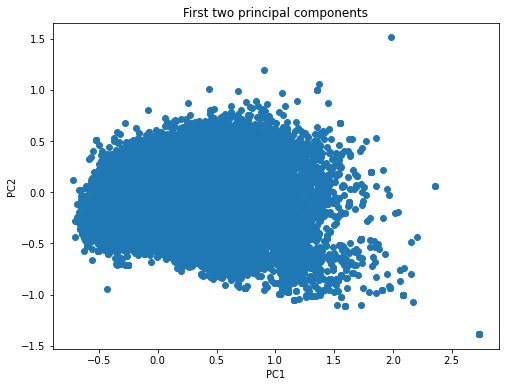

[0.16987056 0.06239072 0.05468604 0.03705087 0.02532733 0.02239651
 0.01781334 0.01661052 0.01306895 0.01280011]


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X_train_wtv)
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()
print(pca.explained_variance_ratio_[:10])


#corpus_df=pd.DataFrame(df_clusters.cleaned_text)
#corpus_df['pca1']=Xt[:,0]
#corpus_df['pca2']=Xt[:,1]

#print(corpus_df[corpus_df['pca2']>0.055].text)

In [11]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=15, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train_wtv)

In [14]:
df = pd.DataFrame({'tweet':df_clusters.cleaned_text.astype(str), 'topic_cluster' :y_km })

In [15]:
df

tweet  topic_cluster
0                           fuck putin war putinswar http              9
1       the ukraine president zelensky rejected u s of...              7
2       chess game national security adviser jake sull...             11
3       fifamedia ppl of yemen afghan syria also saw t...              5
4       march the holy father prays for all the childr...              0
...                                                   ...            ...
202221  consequences of a missile attack on the dniepe...              2
202222                     russia ukraine t co sgu xakfax              6
202223  western sanctions meant to punish pres putin o...             11
202224  shell is set to shut russian petrol stations a...              8
202225  in his neighbourhood through nato second ukrai...              7

[202226 rows x 2 columns]

In [16]:
df.topic_cluster.value_counts()

0     28035
3     27902
5     27227
11    19296
10    17953
7     16863
14    13746
12    13393
8      9432
9      7678
2      7206
13     6335
6      3041
1      2681
4      1438
Name: topic_cluster, dtype: int64

In [21]:
corpus_df=pd.DataFrame(df_clusters.cleaned_text)
corpus_df['pca1']=Xt[:,0]
corpus_df['pca2']=Xt[:,1]
corpus_df["cluster"]=y_km
#[1,4,6,14,9,13]
corpus_df["cluster_label"]=np.where(corpus_df["cluster"]==1,"Humanitarian assistance",
                                    np.where(corpus_df["cluster"]==4,"cities",
                                             np.where(corpus_df["cluster"]==6,"Breaking news",
                                                      np.where(corpus_df["cluster"]==14,"Attacks on cities",
                                                               np.where(corpus_df["cluster"]==6,"EU role",
                                                                        np.where(corpus_df["cluster"]==9,"combat","other"))))))

In [10]:
corpus_df.cluster.value_counts()

0     28035
3     27902
5     27227
11    19296
10    17953
7     16863
14    13746
12    13393
8      9432
9      7678
2      7206
13     6335
6      3041
1      2681
4      1438
Name: cluster, dtype: int64

<Figure size 576x432 with 0 Axes>

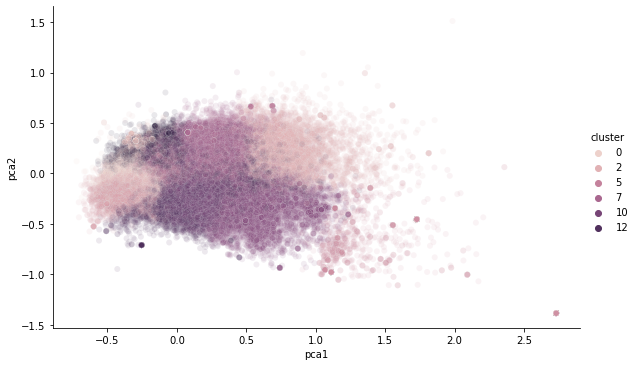

In [12]:
import seaborn
plt.figure(figsize=(8,6))
seaborn.relplot(data=corpus_df, x='pca1', y='pca2', hue='cluster', aspect=1.61,alpha=0.1)

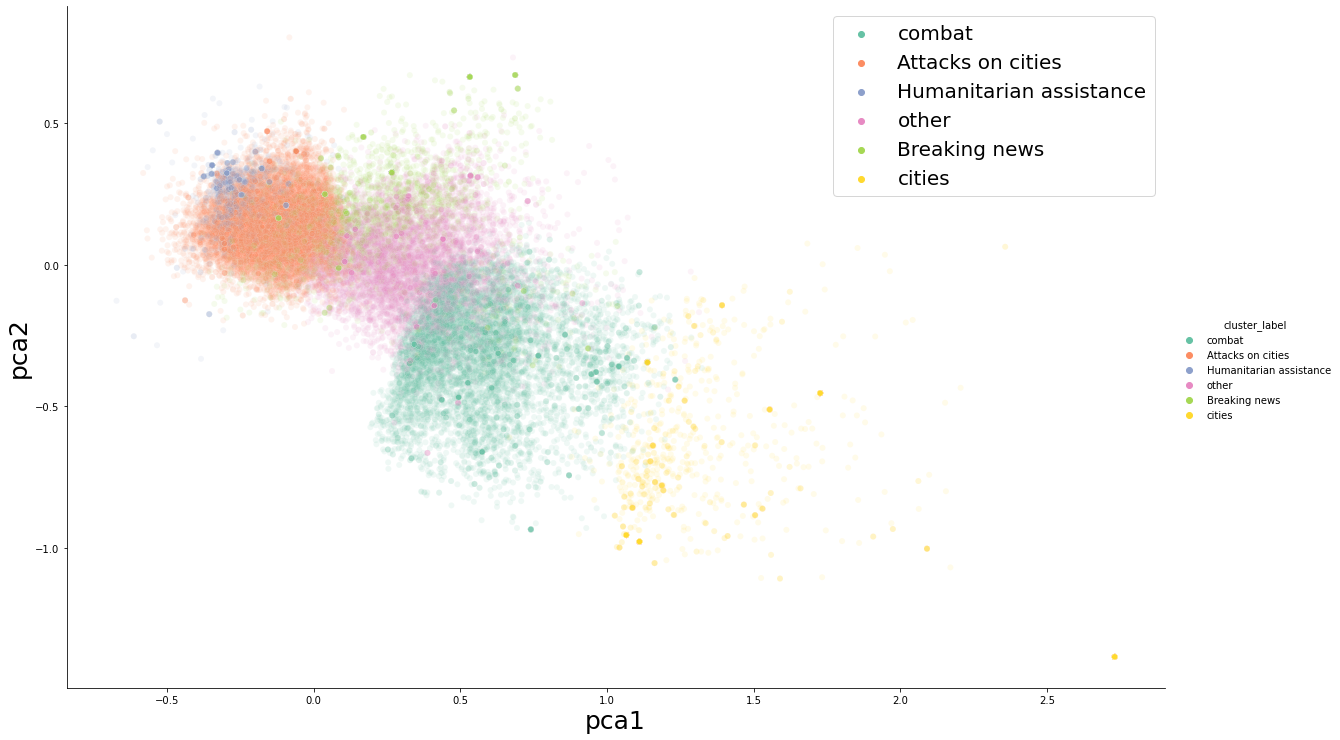

In [24]:
import seaborn
p=seaborn.relplot(data=corpus_df[corpus_df["cluster"].isin([1,4,6,14,9,13])], x='pca1', y='pca2',palette="Set2", hue='cluster_label',height=10,aspect=1.61,alpha=0.1)
plt.rcParams["axes.labelsize"] = 25
plt.legend(fontsize = 20)

#7,11

<Figure size 576x432 with 0 Axes>

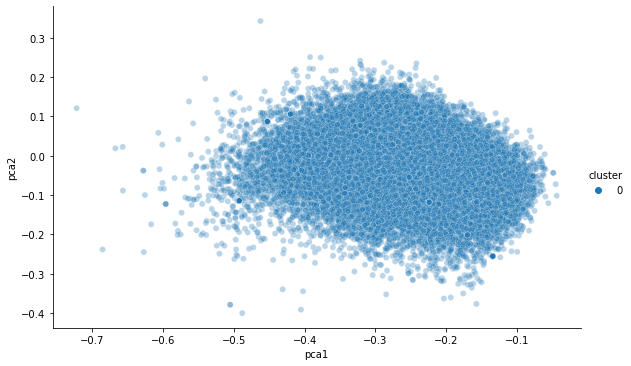

<Figure size 576x432 with 0 Axes>

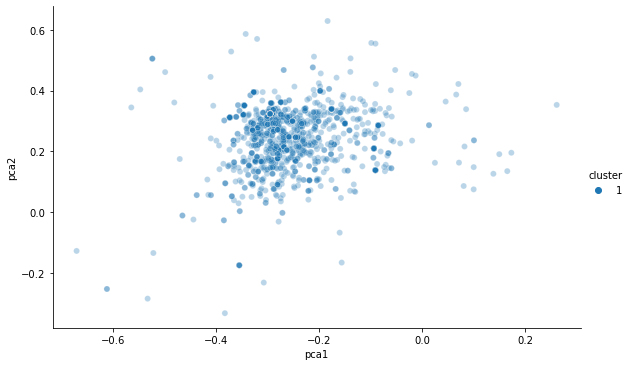

<Figure size 576x432 with 0 Axes>

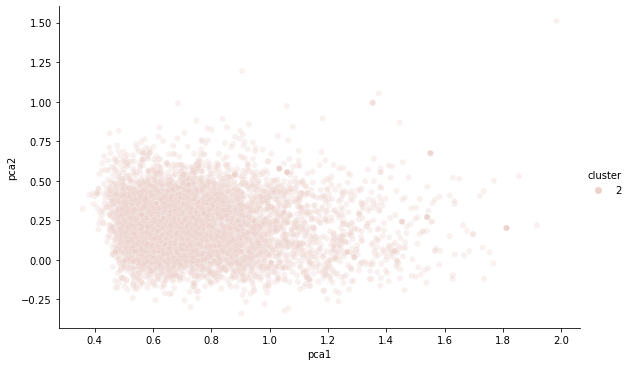

<Figure size 576x432 with 0 Axes>

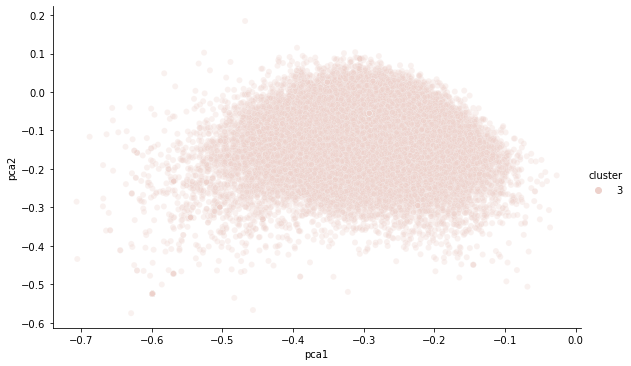

<Figure size 576x432 with 0 Axes>

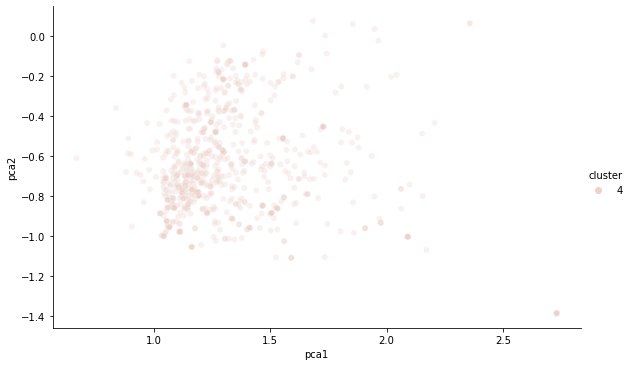

<Figure size 576x432 with 0 Axes>

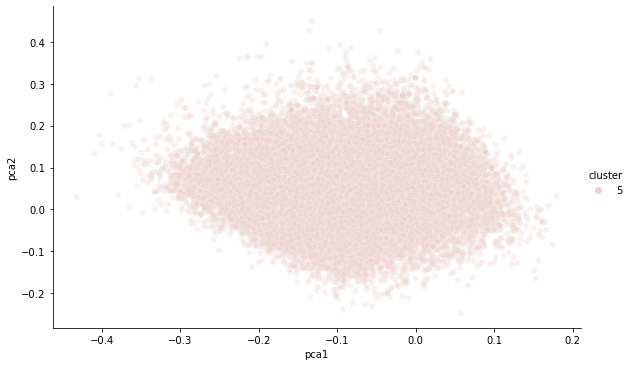

<Figure size 576x432 with 0 Axes>

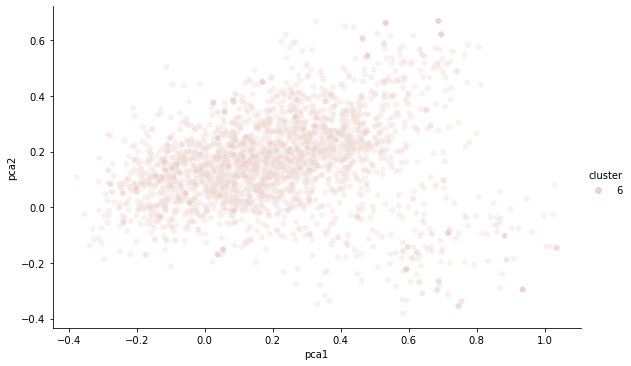

<Figure size 576x432 with 0 Axes>

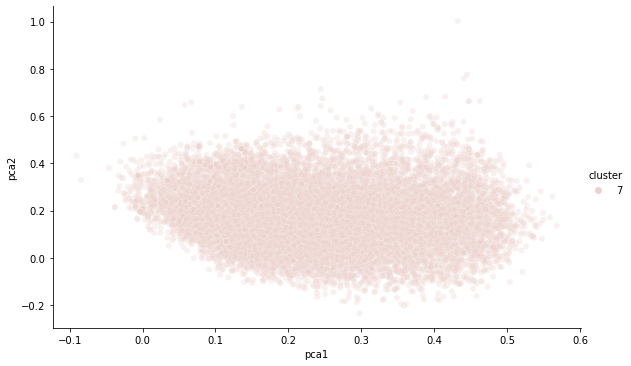

<Figure size 576x432 with 0 Axes>

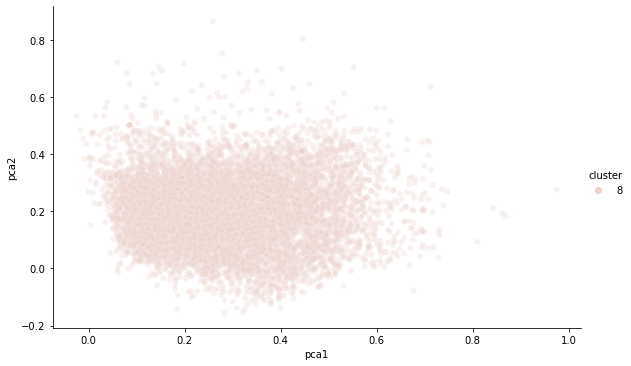

<Figure size 576x432 with 0 Axes>

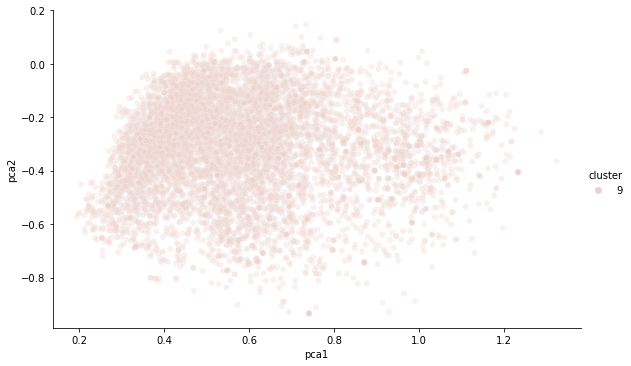

<Figure size 576x432 with 0 Axes>

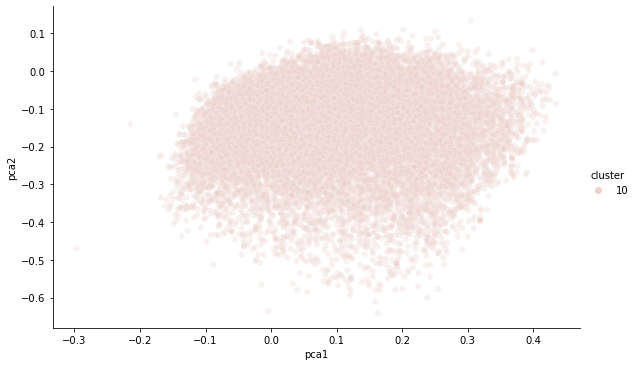

<Figure size 576x432 with 0 Axes>

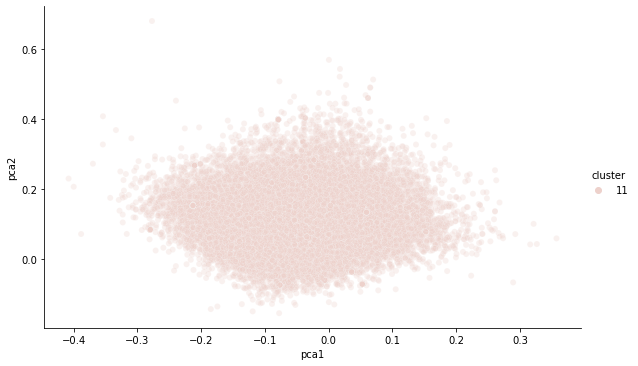

<Figure size 576x432 with 0 Axes>

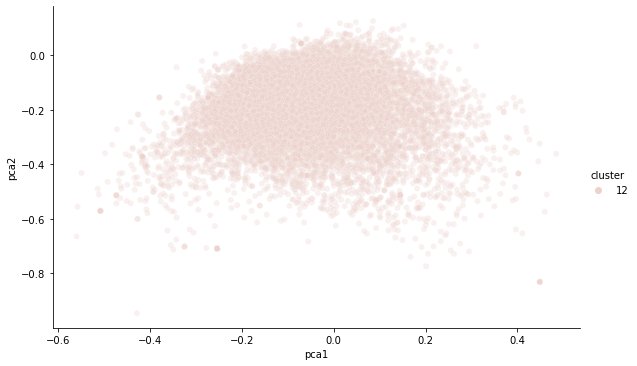

<Figure size 576x432 with 0 Axes>

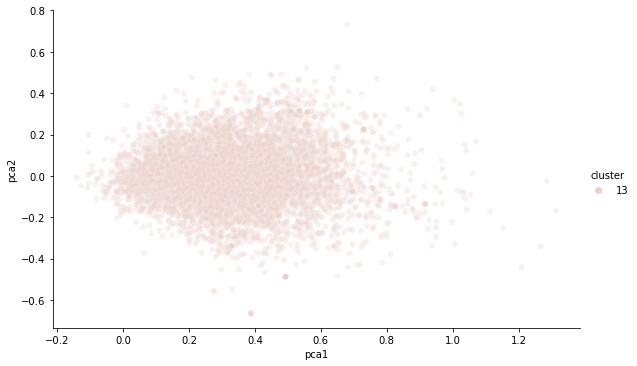

<Figure size 576x432 with 0 Axes>

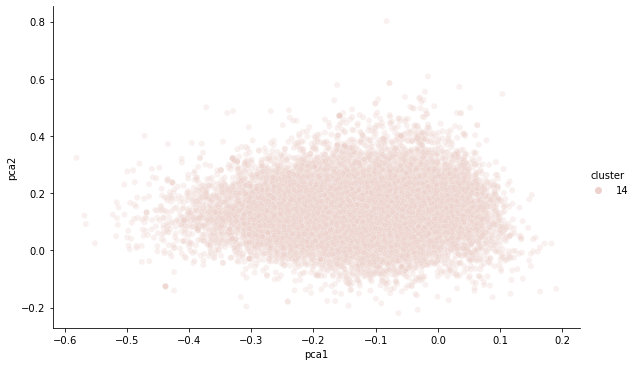

In [14]:
for i in range(15):
    plt.figure(figsize=(8,6))
    seaborn.relplot(data=corpus_df[corpus_df["cluster"]==i], x='pca1', y='pca2', hue='cluster', aspect=1.61,alpha=0.3)
    plt.show()
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icuev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


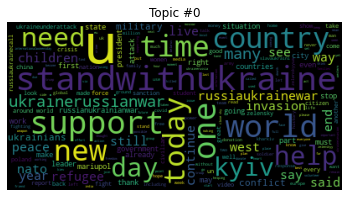

eeriknkross to wait longer is to be an accomplice in the genocideofukrainians stoprussia


all set now for the irlemblisbon stpatricksday family festival to kick off featuring a fundraiser by our friends of gaa pt in support of the red cross appeal for ukraine standwithukraine lafheilepadraig http


ultimately war result the innocent lost their loved ones ukrainerussia peace humanrights http


indiatoday indiatodayflash what is shown as mass grave in marioupol ukraine the dead bodies are bagged and people wearing mask and pp kit are these covid deaths the war is on n still time to dig grave and wear protection gear is this truth of russianukrainewar


this was a former year old student speaking to a un general assembly of peers what if we let students weigh in on the current crisis what novel ideas might they share projectbasedlearning globalcitizens teachsdgs ukrainerussianwar http


cobyyyyy the reading comprehension is nowhere to be found


eucopresident imrankhanpti mariupol direct

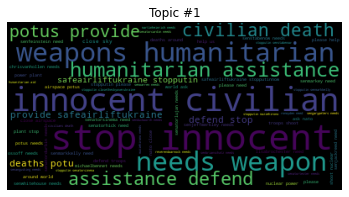

michaelbennet romanian aircraft disappeared do something ukraine needs weapons and humanitarian assistance to defend against putin s invasion potus provide safeairliftukraine


senwhitehouse please close the ukrainian sky defend us from putin stop innocent civilian deaths stopputinnow


michaelbennet dear michael bennet my name is iryna makarenko i from ukraine from kharkiv please please help help ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide


sengarypeters lcvoters close the sky over ukraine stop innocent civilian deaths potus provide safeairliftukraine


ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine stopputin http


senatorhick ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine stopputin


senatormartinpa ukraine needs weapons and humanit

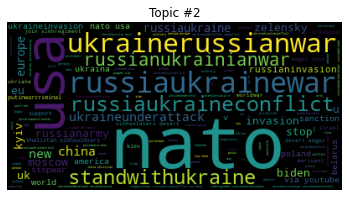

evet ukrainerussiaconflict imperialism sava aven kleerehay r ukraynadanakkuyudandefolputindefolnato sava ahay r ukraynarusya stopwar nowar ukraina putin biden sava ukraine russia nato savasahayir eyl l eylul eyl ld nyabar g n eyluldunyabarisgunu http


russia ukraine ukrainerussia russian troops in irpin km west of kyiv http


fardayt womenncri kiraincongress maryam rajavi ukraine russiaukrainewar stopwarinukraine kyiv standwithukraine zelensky zelenskyyuaaa zelenskyyua


indian maj gen gd bakshi disucsses russian military strategy in ukraine ukrainerussia ukrainecrisis russia http


that s a damn shame ukraineinvasion standwithukraine putin putinswar russia ukraine http


amen russia ukraine http


genocide by russian nazi russiainvadedukraine putinwarcriminal standwithukriane stoprussia ukrainerussianwar stopwarinukraine http


urgent standwithukraine slavaukraini kharkiv kyiv russia ukraine ukrainerussiawar ukraineconflict russiaukrainewar putin donbass luhansk nato wwiii http


qui

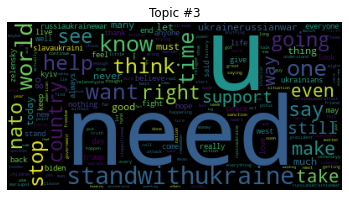

mfa russia these are actually supplies for the children soldiers you sent to war and who are hungry and cold now stop lying stop the war while you still can remove putin


there are no winners in war bankers and politicians start them and everyday individuals like you and i are told to suffer fight kill one another and die bitcoin sanctions http


if only all countries could stand together like what ukraine is doing now we would all be better off


dailymail go on home russian soldiers go on home have you got no f ckin homes of your own for years we fought you without fear and we ll fight you for more lavrov warcrimes moscow russianarmy


potus thanks for the support but how can you be afraid of war if it has already begun you just give him the green light so that he does not stop and move on stopputinwar russiainvadedukraine safeairliftukraine http


this idea of if they originate look we can figure out how to get those mig s there zelensky a week ago begged us begged us for those mig

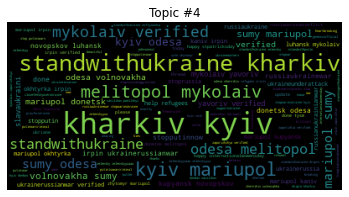

inlove with hoseok http


ukrainewar lies http


outstanding slavaukraini http


impacable clair ukrainerussianwar http


snob project sos help ukraine ukraine help sos kiev stopputinnow belarus http http http http http


breaking http


politics ukrainerussia russiaukrainewar http


eunotforme http http


u dabest http


woah morningjoe msnbc ukrainerussia http






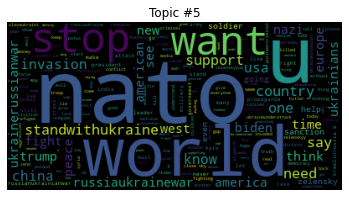

valerykosta put weapons peace in use this freely for poster tshirt banner anything from hiro tokyo ukrainewar ukraine ukraineunderattack stoprussianaggression stopwar stoprussia stopputin stopputinnow stopputinswar stopputinsgenocide


estoff hello bot no i didn t but russian intel which is present on telegram has been posting updates non bias since february tell it like it is news and not fake news propaganda coming from the west russianarmy ukraineunderattack russiaukrainewar


paypal stops its work in russia due to the conflict between russia and ukraine this means that now i won t be able to take orders i am very upset by this news it is a pity that the innocent suffer i will have to look for another payment method or stop accepting orders war http


make nft no war standwithukraine


the world should come together to cut russian internet service until putin is out of the game ukraine


dalperovitch putin lied to the west lied to his own troops it s only an exercise they should sur

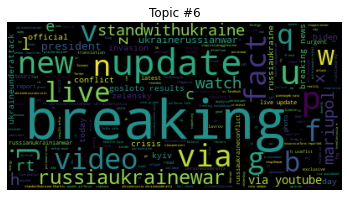

ukraine t co ddwa cchgu


escobar t co kwp pu abj


update t co eebuqt s


attn t co sg keujasd http


ucraina russianukrainianwar nowar standwithukraine operative information as of t co xp awg mif


ukraine t co f agljvl e


t co a aimcsg


watch live t co svtlqxsw c via youtube


cartoon t co xc usmi nf army war


kyiv mayor vitaliy klychko t co a u zdiwkr






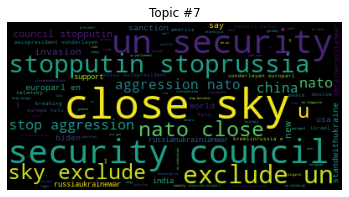

following israel ksa uae closely they wanted to partner with russia since with the help of trump kushner against iran eu nato maybe this helps you understand why the f http


better luck next week rule please don t shoot explosive objects at the nuclear reactor putin ukraine ukrainewar ukrainerussiawar apocalypse nuclearwar nukes nato http


italymfa luigidimaio tamimbinhamad italyinqatar embargo on russian oil gas now nato stop this genocide eu usa japan stop buying russian oil gas stop financing genocide


yesterday responding to us president biden calling russia s botox tsar putin a killer an old russian man got a bit animated http


un international court of justice orders russia to halt invasion of ukraine ukraine the guardian ukraine ukrainewar ukraineunderattack stopwar ukrainerussiawar ukraineinvasion russianukrainianwar http


mcdonald s closes all restaurants in russia as bbcrussian reports http


ukraine invasion t co i vzsfvb s via youtube russia ukraine assault russiaukrai

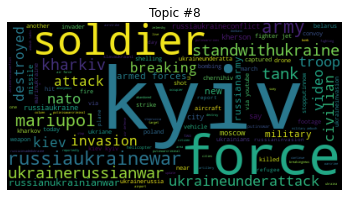

bat coronavirus found in u s funded bio lab in ukraine russian defense ministry with english subtitles posted usbiolabs usbiolabsinukraine usbiolab russia ukrainian http


ukrainians in russian occupied berdyansk staged a rally against the occupation stopputinnow stoprussia stoprussianaggression http


new wiper malware hermeticwiper targets ukrainian systems http securityaffairs hacking russiaukraineconflict


coinbase blocked russian wallets it has million accounts coinbase russia btc http


watch the trending video of a ukrainian soldier proposing his girlfriend trendingvideo russia ukrainewar http


live camera kyiv ukraine day war ukrainewar kiev russiaukrainewar ukrainerussiawar http


new owners a russian army t a tank captured today by ukrainian forces near sumy in northeastern ukraine kharkhiv ukraine kyiv nuclearpowerplant zaporizhzhia ukrainerussianwar ukraine kyiv lviv elonmusk http


citizen of ukraine tries to stop russian tanks without any weapon ukraineinvasion ukraineu

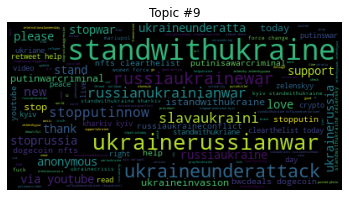

shame of you ukrainerussiawar ukrainerussia ukraineunderattack http


ukraine truth bomb alert freepalestine http


kremlinrussia e protesting pos putin s war putinswar putinswarcrimes putinskrieg standwithukraine http


bawahahahahah lmfao tangodown ukraineunderatta k fckputin ukrainewar hackersagainstputin oprussia standwithukraine ukrainerussianwar ukriane putinswar putinswarcrimes anonymous anonfamily opanonymous humanity expectus nomorewar stopwar stopputin stoprussia http


putin go fckyourself putingofuckyourself fuckz standingwithukraine putinisawarcriminal http


jesus is no nft http


the putin show http


no war in ukriane nowar http


good morning everyone standwithukraine scottishindependence toriesinputinspocket pateltogo http


uhm i need to sing this http






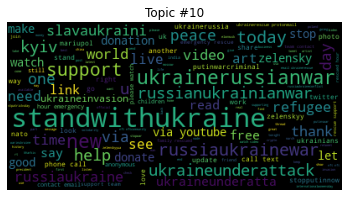

last hour of giveaway wl free nft how to win follow guardiansofukr like retweet tag friends join discord to participate http nft nftcommunity nftgiveaway nftart opensea whitelist nftdrop ukraine whitelist freenft http


kjalee if you have family to be rescued in ukraine here is the hour emergency rescue support team contact email ukrainerescue protonmail com phone call or text or or http


excellent thread explaining the why s and why nots concerning the stalled russian army column north of kyiv ukraine ukrainerussiawar putinwarcriminal slavaukraini http


darashi comment for better reach sending prays and hope follow for more please watch this video ukriane russia russiaukrainewar solidaritywithukraine standwithukraine russian ukrainewar kiev kharkive wwiii zelensky ukrainerussia ukraineunderattack http


italy s president mattarella attended mass at ukrainian church in rome today ukraine http


remember tankman from june th here another one for you in ukraine this time russiaukrainew

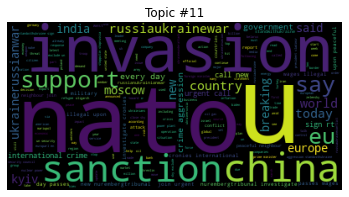

flash russia says they will stop war in an instant if ukraine cease all military action remains a neutral country recognizes crimea as russian territory the separatist republics as independent kremlin spokesman reuters ukrainerussianwar russia http


forty five african least developed countries import at least of their wheat from ukraine russia of those countries import at least raj patel t co hflcueyuy


on the same day with the estonia s th independence day february an unprovoked russia s military attack on ukraine took place estonians friends of eesti in norway celebrated the estonian independenceday in oslo today strongertogether standwithukraine http


case no feb warcrimestracker volnovakha residential area was indiscriminately shelled by russia this constitutes a warcrime in violation of articles of additional protocol i russiaukrainewar putinkrieg ukraine http


blog by chris han the agony of ukraine meanwhile the immediate winners of this catastrophe are washington numerous la

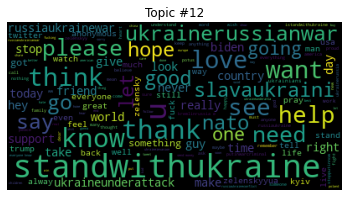

people keep asking me how this is going to end and i say what do you mean end fascinating analysis on russia s ukrainewar by ianbremmer http


he wants ppl to believe their sacrifice will mean something russiaukrainewar http


when ulit


kallerovanpera y o finnish won wrc rallysweden and min after crossing the finish line in an interview said honestly i don t feel like celebrating when i ll think about what happening in ukraine i just hope lot s of strength for them it s all i can say hero


guys we did it russianembassy don t you dare again communicate blatant misinformation here on this platform or try to gaslight i hope you ve learnt your lesson stoprussia standwithukraine http


and we ll not give them planes to strike back because we re cowards ukraine do what you want putin we ll just watch most are bored with this and are watching sportsball http


definitely worth watching this russian pow talk about ukraine http


ng ukraine please tell everyone do not believe that kherson is

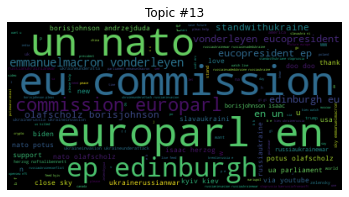

link t co ygvjailvch ukrainerussianwar ukrainerussiawar anonymous eurovision russianukrainianwar thebatman ukraineappeal insiders putinwarcrimes putin stopputinnow shiba davidoo fintech ghanaat haechan goodperson jeru lfc loveisblind iphone http


starting to h som


lolgop live feed of kyiv kiev ukraine watch live t co b pevnzhp ukraine russia kyiv kiev ukrainerussia ukraineinvasion ukraineunderattack ukrainewar russianinvasion russiaukrainewar russiainvadedukraine russiaukraine


ua parliament nato stopputin stop the genocide of the ukrainian people close the sky over ukraine emmanuelmacron vonderleyen eucopresident ep edinburgh eu commission europarl en un nato olafscholz coe potus ep president rterdogan bundeskanzler http


dr peter g kinesa s digest the new global http


worldnews stand with the people of ukraine now accepting cryptocurrency donations bitcoin ethereum and usdt btc bc qx yysmhqmsw h mfr hyfm wc q hcsr fsl eth and usdt erc xfc d d f ef a c cde e fa ukraine ukraineru

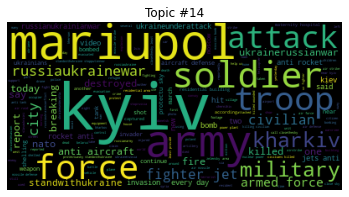

mayor russian troops shell mariupol every minutes russian invaders have shelled residential areas in mariupol donetsk oblast with artillery and rocket systems according to mayor vadym boychenko they have also prevented the evacuation of civilians from the city http


mariupol residents are forcibly being deported into filtration camps inside russia ukraine ukrainematters standwithukraine democracy putinsgenocide putinswarcrimes http


thousands of people at the railway station in lviv waiting for a train to poland ukraine ukrainewar http


russiaukrainewar day live a large explosion was heard in maidan square and multiple blasts around ukraine s capital have been reported burning vehicles have also been seen on kyiv s peremonhy ave read http


border troops attacked the occupiers in the luhansk region many vehicles were seized and or destroyed stoprussia stopputin ukraine ukrainerussiawar ukraineinvasion ukraineunderatta k standwithukraine http


ukrainian refugee fleeing the russian w

In [22]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import random
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
STOPWORDS=STOPWORDS+["russia","ukraine","russian","putin","co","people","war","ukrainerussiawar","ukrainian","ukrainewar","russians"]
pattern = re.compile(r"\b(" + r"|".join(STOPWORDS) + r")\b\s*")

from wordcloud import WordCloud
df["tweet"]=df["tweet"].astype(str)
for t in range(15):
    col=df[df.topic_cluster==t].tweet
    text = " ".join(tweet.lower() for tweet in col)
    text = pattern.sub("", text)
    plt.figure()
    plt.imshow(WordCloud().generate(text))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()
    randomlist = random.sample(range(0, 1000), 10)
    for j in randomlist:
        print(df[df.topic_cluster==t].iloc[j,0])
        print("\n")
    print("\n")
    

In [26]:
df_clusters[""]=df_clusters.cleaned_text.astype(str).str.replace("http","").str.replace("co","")

In [27]:
wtv_vect_1 = WordVecVectorizer(word2vec)
X_train_wtv_1 = wtv_vect.transform(df_clusters.cleaned_text.astype(str))
print(X_train_wtv_1.shape)

(202226, 300)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icuev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


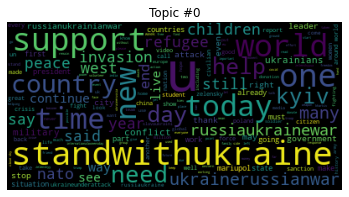

eucopresident imrankhanpti mariupol direct strike of russian troops at the maternity hospital people children are under the wreckage atrocity how much longer will the world be an accomplice ignoring terror close the sky right now stop the killings you have power but you seem to be losing humanity


agree very very powerful and personal speech by elizabethmay we must invent new initiatives to save ukraine and save democracy standwithukraine putinswar putinswarcrimes http


first time in history eu to finance lethal weapons for third country we are waiting for that special parcel from eu standwithukraine


tigrayan women have little to no access to food medicine electricity as feminists they need you to advocate for an end to this deadly siege daysoftigraygenocide accord online femwiseafrica keziehelen aubinetadiop drjoycebanda au wgdd http


ukraine and russia engaged in another round of peace talks today peace negotiators held a minute video call with working groups expected to continu

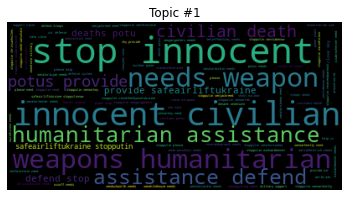

maziehirono ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide airdefenseforukraine safeairliftukraine stopputin


senatorcardin ukraine needs closed sky over it weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine stopputin


senjeffmerkley close the sky over ukraine ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine stopputin


senbrianschatz ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine stopputin stoprussianaggression


ronwyden ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine stopputin we need shelter from the sky russian soldiers attacking nuclear power plants


senbrianschatz ukraine n

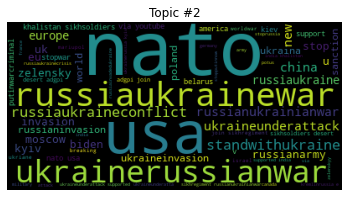

slavaukraini russian revolution against putinwarcriminal http


pennsylvania ukraine nyc washington california losangeles texas newyork florida czas apokalipsy film animowany the time of apocalypse http


bayraktar dromes targeted russian train with fuel ukrainewar ukraine kyiv russia http


deadliest sniper ukriane russiaukraineukrainewar russiaukraine russia russianukrainianwar ukraine ukraine http


ua parliament eu commission vonderleyen ua eumission eudelegationua euronews bbc cnn foxnews cnbci cbcnews msnbc ddnewshindi aljazeera world ndtvindia dw europe skynewsbreak france abc nhk news africanews alarabiya eng africa tv business nytimes support ukraine closetheskyoverukraine


yankee go home ukraine ukrainerussia zelenskiy usa america istandwithrussia biden putin russia http


captured russian t s ukraine russia tpyxaenglish http


russia t co st ewqhoqz via icn uk ukrainewar ukraine


fwd we the media aussiecossak the lies go deep msm media hausfeldglobal hrw barristersuk syria

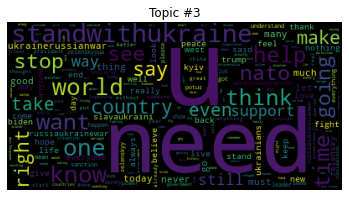

interesting debate on ukraine but certain narratives must be deleted from sight too by rep team censorship in effect so i suppose the natural inference is nobody must think on those aspects so behind the chat is the lines arnabgoswami


no matter how strong ukraine and forces are when the russian convoy get to kyiv it s going to be a bloodbath this needs to stop ukrainerussianwar stopputin


simon beene beene nikamelkozerova i second this tweet i can only imagine how hard it is for her and all ukrainians right now to think that country is being destroyed they have to keep working to survive injustice amplified nika rebrand your service take it is given in solidarity standwithukraine


we need to step forward


stopputinnow since it only gets worse diplomatic efforts alone are worthless since putinlies constantly stopbuyingrussianoil let us freeukraine and freerussiafromputin http


it is zelensky not zalensky is it not stoprussianaggression stopputin putin putinswarcrimes http


latime

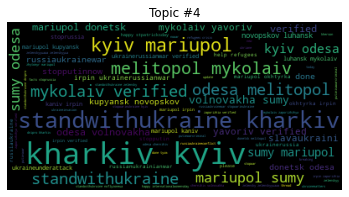

beautiful slavaukraini http


kyivpost legend standwithukraine cobi http


exactly standwithukraine http


standwithukraine ukraine kharkiv kyiv mariupol kupyansk novopskov luhansk mykolaiv verified http


bizhour happy stpatricksday http


domande salvini putin russiaucraina stopwar http


standwithukraine ukraine kharkiv kyiv mariupol donetsk odesa melitopol mykolaiv yavoriv verified http


putin ukraineunderattack ukrainewar putinswar carlsagan http


sandrine jobbin standwithukraine ukraine croixrougefrancaise solidarit aidehumanitaire http


putins logic putinwarcriminal russianukrainianwar ukraine freeukraine http






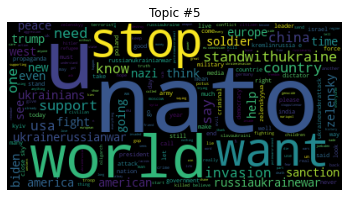

putin is becoming the king of ashes russianukrainianwar putinwarcrimes putin putinwarcriminal


un nato california newyork canada mexico shtf cop poor people get the bike lane and the rich get the e v s and charging stations what a bargain


ongoing misconception about sweden being neutral or demilitarised as an example for a russian deal to ukraine sweden wasn t neutral in the cold war not after and not now it is part of the eu military cooperation trains with nato more t co pxgdgg qy


russia will soon take kyiv and the pathetic jew zelensky will go to jail ukraine will cease to exist you chose war so you will get war stupid ukrainians ukraine russia kyiv putin http


what the fool clown and homosexual genocidal miserable putin did not learn from hitler s blitzkrieg http


america it s time we come together and boycott riding horses with no shirt on russia http


this time now change world blind roles we stand with russia russia worldwariii putin


boycottcocacola go bigger and more 

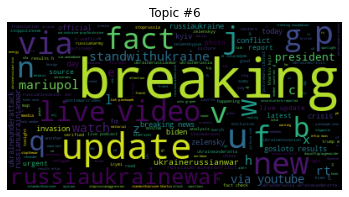

ukraine war t co cxbivpgxiy


noam chomsky t co p qkdojdro


new cartoon t co wli rzyhg


mjszanto t co igqba xrht


mfa t co itx ufaz


breaking t co qjawtntynm


war in ukraine t co zknxuvwhl


live t co ts oaxnc


unconfirmed t co ubms rlxfo


ukraine t co xoqhnclf f






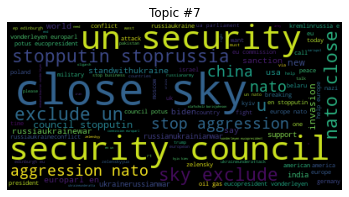

ukrainerussiawar ukraine stoprussia russia poutine it s time to be realistic http


putin has activated all nuclear commands dear f king joe biden you did it russiaukrainewar russian nukes bidenisafailure bidenswar


so the grand army of russia needs help in overthrowing ukraine sad http russia stoprussia stopputin ukraineunderattack anonymous putinisawarcriminal ukraine ukrainewar war


ukraine must not become full fledged nato war with russia stoltenberg tells afp in antalya


cmc nato nlatnato stop russian aggression against ukraine nato close the sky over ukraine exclude russia from the un security council stopputin stoprussia


presidentofbg oecd mathiascormann stop russian aggression against ukraine nato close the sky over ukraine exclude russia from the un security council


the real question is what could israel russia germany possibly be plotting geopolitics ukraine ukrainerussianwar http


sanusi africa stand with putin


russia invasion of ukraine the mayor of kyiv vitali kl

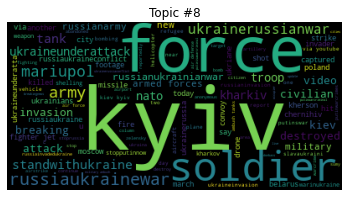

russian strike destroys ukrainian airport zelensky ukraine http


a missile hit in kyiv caught on cctv ukraine ukrainerussiawar ukraineunderattack ukraine war russianukrainewar http


kharkiv morning heavy snowfall cold mountain kharkhiv snowfall ukraine russian http


russian troops entered novopskov luhansk region civilians blocked the streets ukraine ukrainerussiawar http


putin russian russia ukraina stopwars kyev kyivnow urgent a bad day is passing for the russians today russian soldiers were arrested http


ukraine consequences of a night air strike on sumy which killed people http sumy ukraine russia http


two olafs that thrive in winter ask olafscholz to stop buying russian oil and gas german euros buy russian bombs ukraine ukrainerussianwar ukrainewar http


footage from zaporizhia nuclear powerplant which is under russian control osint russia ukraine http


now kharkiv region air alarm http ukrainerussianwar ukrainewar ukraine kyiv ukrainearmy russian russianukrainewar puti

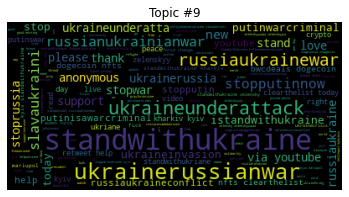

giving away the http good luck http


colours of racism exposed by russiaukrainewar http


stole this from dietfoodchick ukraine putinwarcriminal ukrainekonflikt putinhitler http


putinisawarcriminal ukrainewar stop this madness http


tower jeremiah good job you http


istandwithukraine zelensky is a hero neversurrender bluevoices http


more art from single stopdictatorship on instagram http soundcloud http audius http synthwave cinematic ambient instrumental electronicmusic popart soundtrack cyberpunk stopputin stopwar http


ukraine propaganda perception messaging mediawatchdog russiaukraine http


turning tables putinwarcriminal putin ucrainarussia invasionofukraine http


fascinating stuff bigsteal putin http






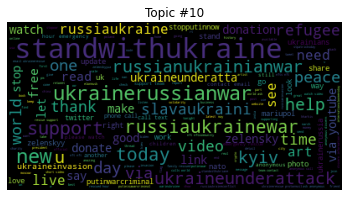

soft power from arnold schwarzenegger a smart way to standwithukraine http


devobrown shares who he s inspired by this internationalwomensday http


my uncle william affectionately known as billy was a rear gunner crewing on lockheed liberators for the raf read the full article sensitivity http raf war respect http


standwithukraine featuring art and inspiration from the barren county kentucky boys girls club children want peace http


moscowstockexchange reopens plunging almost percent news agency afp ukrainerussiacrisis russiaukrainewar russiaukraineconflict russiaukraine http


and in nature i found my peace bucari pine forest http


where is the new alex crawford kate adie reporting from the front in ukraine


amitpalengineer shocking news russia banned from participating in the miss supranationa http via youtube russiaukraine do you think it was a good decision from the organization


lukashenko explaining to putin his great plans who said kindergarten was easy belarus russia uk

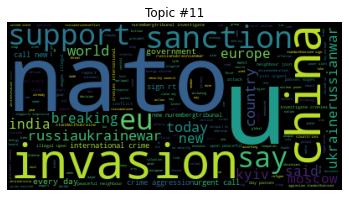

just in belgium is set to postpone its plan to shut down nuclear energy by years amid energy crisis and russian invasion of ukraine ukraine russia belgium stopwar


mid rf rusembest nato rusembukraine natomission ru natoporusski russiainusa edipatstate statedept rf osce osce smm mfa ukraine russia is committing genocide for the second time in ukraine murdering civilians en masse million murdered how many this time


ukraine poroshenko commander of the special forces of photographic operations t co cg zdu fls


eset researchers have discovered a destructive data wiping malware targeting orgs in ukraine rd in weeks attacking systems in ukraine defending itself against a russian invasion http dynamicciso daysofcode russiaukraine girlswhocode cyberattack


it s official russia failed to prevent un security council from calling th ever emergency special session of un general assembly on ukraine procedural resolution passed so it s on to unga result for against russia abstentions china uae i

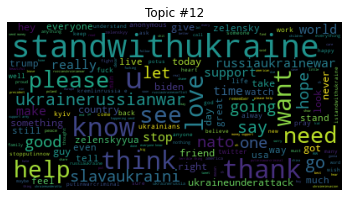

putinwarcriminal you are a dishonorable bastard killer longliveukraine putinhitler putin warcriminalputin i m interested in coming to ukraine and fighting you and your bastard soldiers whether i survive or be killed http


listen to bands from ukraine and keep perspective t co jzuezf ezn


justintrudeau thank you westandwithukraine stoprussia


johncleese i you taking about nato


citi cease operations in russia you are losing money daily and may not be able to recover your reputation stopputinnow esgdivestrussia boycottrussia standwithukraine ukrainewillprevail http


boschglobal never forget your humanity and respect human dignity in your dealings with others robert bosch boschglobal are you invented for death truly professional boschlegacy bosch standwithukraine stoprussia stopwar stoprussianaggression nowar stopbusinessinrussia http


gregabbott tx if you really want to stand with america and ukraine will you promise to stop taking nra donations standwithukraine http


can putin be

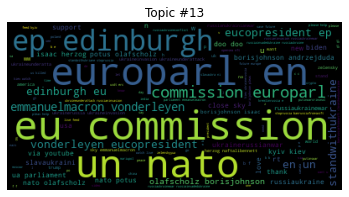

lowcee defichain can you donate usdt for me today please usdt erc xc b ea ca b e b f f ukriane bitcoin usdt ethereum binance help abdu abd avax stopwar stopputin stoprussia kiew http


i m but i m not done yet ukraine ukrainian ukrainianarmy russia moscow zelenskyy russianinvasionofukraine russianinvasion putinwar putinism ukrainewar http


i own books therefore i am smart americans war http


cryptogems austinahilton koromaruinu koro koromaruinu squiddogs eth ukraineunderattack p e playtoearn casinocard nft eran up to per day http


i hate that i agree with lindsey graham on something ukraine stopputinnow istandwithukraine http


farnesina sg amb ettoresequi with sos germanydiplo andreas michaelis on the ukraine crisis t co lj miczgwh


finally reunited with my bestie applesepulveda and my travel roomies berry sn and michael rides singlespeed spring cebucity philippines besties travellers turningwheelsbeer whereintheworldisouien http


russia ven j vihapuhetta sota ukraina no hostige 

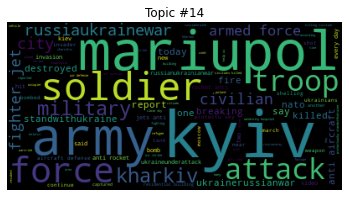

the th temporary flight carrying evacuated chinese nationals from ukraine landed home safely on thursday morning in hangzhou e china s zhejiang province http


elena osipova was arrested at an anti war demonstration in st petersburg she is one of the best known survivors of the german blockade of leningrad which killed over a million civilians putin worldbookday standwithukraine ukraine http


russia army kills civilian who raised his arms in surrender zhytomyr highway civiliancasualties http


breaking russia lost warplanes planes helicopters armored fighting vehicles more than soldiers and over tanks in our retaliatory action claimed ukraine kyiv ukrainecrisis russiaukraineconflict


residential buildings are also on fire kharkiv ukraine russiaukrainewar putin http


russian troops dead no ukraine soldier has died no ukraine tank destroyed wonderful ukrainians must have super powers


the capital kiev is being considered a key target of the russian military in the war with ukraine to

In [28]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=15, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train_wtv_1)

df_2 = pd.DataFrame({'tweet':df_clusters.cleaned_text.astype(str), 'topic_cluster' :y_km })

import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import random
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
STOPWORDS=STOPWORDS+["russia","ukraine","russian","putin","co","people","war","ukrainerussiawar","ukrainian","ukrainewar","russians"]
pattern = re.compile(r"\b(" + r"|".join(STOPWORDS) + r")\b\s*")

from wordcloud import WordCloud
df_2["tweet"]=df_2["tweet"].astype(str)
for t in range(15):
    col=df_2[df.topic_cluster==t].tweet
    text = " ".join(tweet.lower() for tweet in col)
    text = pattern.sub("", text)
    plt.figure()
    plt.imshow(WordCloud().generate(text))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()
    randomlist = random.sample(range(0, 1000), 10)
    for j in randomlist:
        print(df_2[df_2.topic_cluster==t].iloc[j,0])
        print("\n")
    print("\n")
    


In [39]:
#!pip install pysentimiento

In [41]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="en")

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [78]:
x=analyzer.predict("what a great player is Messi")

In [79]:
x

AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.006, NEG: 0.002})

In [80]:
x.probas["POS"]

0.991806149482727

In [59]:
df_putin=df[["putin" in tweet.lower() for tweet in df.tweet]]

In [62]:
for i in df_putin.tweet[:10]:
    print(i)
    print("\n")

fuck putin war putinswar http


evil is here with new nft if you think you are bad then i am your dad this nft shows this attitude nftart nftsale ad nftviral nftartist nftcommmunity openseanft muskvsputin putin check out my nft listing on opensea http via opensea


civilians have died in mariupol in putinswar on ukraine around hundred aviation bombs dropped on the city residential areas


it isn t enough to grind mariupol to rubble now the treacherous putinwarcriminal s military has bombed an art school with people inside seeking shelter from the carnage and russianarmy is taking ukrainians back to russia to concentration camps this is bullshit


senmarkey ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine


breaking the kremlin putin signs a decree on taking special economic measures against washington and the countries that joined it ukraine russia follow sky earth


find the differences ukraineruss

In [ ]:
df_clusters["text_2"]=df_clusters

In [63]:
df_zele=df[["zelensky" in tweet.lower() for tweet in df.tweet]]

In [64]:
for i in df_zele.tweet[:10]:
    print(i)
    print("\n")

the ukraine president zelensky rejected u s offer to evacuate him from kyiv washington post ukriane russia zelenskiy washingtonpost http


find the differences ukrainerussiawar freepalestine zelensky bennett biden bidenswar putinswar russiaukrainewar http


maryfakhar maryam rajavi kiraincongress ukraine russiaukrainewar stopwarinukraine kyiv standwithukraine zelensky zelenskyyuaaa zelenskyyua


meet the leader of the free world zelensky standwithukraine http


olgatokariuk absolutely remember how republicans were calling zelensky a thug a drug dealer a corrupt leader during tfg s impeachment hearings why does it take threat of nuclear disaster to force these media companies to do the right thing zelensky gop


zelenskyyua plz understand nato usa no body will come to help they want ukraine to fight till last man standing where are the sanction till date even swift not implemented usa sanction on oil gas make no sense becoz they export britain will stop by end of


prediction nestle wil

In [77]:
def sentiment_tweet_positive(text):
    sentiment=analyzer.predict(text)
    return sentiment.probas["POS"]

def sentiment_tweet_negative(text):
    sentiment=analyzer.predict(text)
    return sentiment.probas["NEG"]

In [82]:
putin=df_putin.iloc[:1000,:]
zeln=df_zele.iloc[:1000,:]

In [83]:
putin

tweet  topic_cluster
727255                       fuck putin war putinswar http              9
1550751  evil is here with new nft if you think you are...             12
1402926  civilians have died in mariupol in putinswar o...             14
1914165  it isn t enough to grind mariupol to rubble no...              0
548100   senmarkey ukraine needs weapons and humanitari...              1
...                                                    ...            ...
1514303  oil price is set at the barrel by opec putin a...             11
1951809  oh dear we need to step up supportukraine nato...             12
579800   now russia fires on nuclear power plant in ukr...             11
368989     who lost ukrainerussiawar putinwarcriminal http              9
1765370  russian autocrat vladimir putin is a murderous...              7

[1000 rows x 2 columns]

In [87]:
print(putin.shape,zeln.shape)

putin["positive"]=putin.tweet.apply(sentiment_tweet_positive)
putin["negative"]=putin.tweet.apply(sentiment_tweet_negative)

zeln["positive"]=zeln.tweet.apply(sentiment_tweet_positive)
zeln["negative"]=zeln.tweet.apply(sentiment_tweet_negative)

(1000, 4) (1000, 4)


<ipython-input-87-32a4071abaec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putin["positive"]=putin.tweet.apply(sentiment_tweet_positive)
<ipython-input-87-32a4071abaec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putin["negative"]=putin.tweet.apply(sentiment_tweet_negative)
<ipython-input-87-32a4071abaec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [88]:
putin.describe()

topic_cluster     positive     negative
count    1000.000000  1000.000000  1000.000000
mean        6.342000     0.041467     0.589954
std         4.056043     0.145307     0.374533
min         0.000000     0.002671     0.000706
25%         3.000000     0.003297     0.206716
50%         5.000000     0.005561     0.736583
75%        10.000000     0.011977     0.945388
max        14.000000     0.990232     0.985698

In [89]:
zeln.describe()

topic_cluster     positive     negative
count    1000.000000  1000.000000  1000.000000
mean        6.021000     0.104295     0.397467
std         4.072978     0.244245     0.400622
min         0.000000     0.002663     0.000697
25%         3.000000     0.003945     0.009862
50%         5.000000     0.009131     0.217371
75%        10.000000     0.035872     0.862659
max        14.000000     0.989645     0.985819